In [3]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Importing machine learning libraries from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data to numerical data
from sklearn.naive_bayes import MultinomialNB  # For applying the Naive Bayes algorithm for classification

In [4]:
full_data = pd.read_csv('/content/Email_Data.csv')

In [6]:
# Display the shape (number of rows and columns) of the DataFrame 'full_data'
full_data.shape

(5572, 3)

In [ ]:
# Display the first five rows of the DataFrame 'full_data'
full_data.head()


,Label,Message,Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [7]:
# Count the occurrences of each unique value in the 'Category' column of the DataFrame 'full_data'
full_data.Category.value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

In [8]:
# Convert the data type of the 'Category' column in the DataFrame 'full_data' to categorical
full_data['Category'] = full_data['Category'].astype('category')

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Label     5572 non-null   object  
 1   Message   5572 non-null   object  
 2   Category  5572 non-null   category
dtypes: category(1), object(2)
memory usage: 92.8+ KB


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

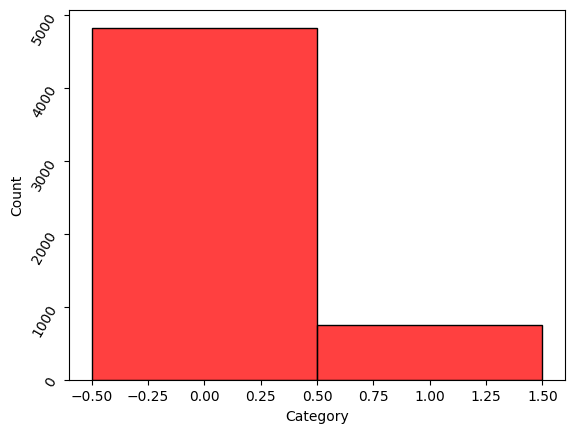

In [10]:
# Plotting a histogram of the 'Category' column in the DataFrame 'full_data' using seaborn
sns.histplot(data=full_data, x=full_data['Category'], color='red')

# Rotating the y-axis labels by 60 degrees for better readability
plt.yticks(rotation=60)


In [11]:
# Count the number of missing values in each column of the DataFrame 'full_data'
full_data.isna().sum()


Label       0
Message     0
Category    0
dtype: int64

In [12]:
# Remove duplicate rows from the DataFrame 'full_data'
full_data.drop_duplicates()


,Label,Message,Category
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [13]:
full_data.shape

(5572, 3)

In [14]:
# Assigning the 'Message' column of 'full_data' to the variable x
x = full_data['Message']

# Assigning the 'Category' column of 'full_data' to the variable y
y = full_data['Category']

In [15]:
# Importing train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
# x_train: features for training data
# x_test: features for testing data
# y_train: target labels for training data
# y_test: target labels for testing data
# test_size=0.2: 20% of the data will be used for testing, 80% for training
# random_state=4: setting a seed for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)


In [16]:
# Printing the shape of the 'x' variable
print(x.shape)

# Printing the shape of the training data for features
print("x train ", x_train.shape)

# Printing the shape of the testing data for features
print("x_test", x_test.shape)

# Printing the shape of the training data for target labels
print("y_train", y_train.shape)

# Printing the shape of the testing data for target labels
print("y test", y_test.shape)

(5572,)
x train  (4457,)
x_test (1115,)
y_train (4457,)
y test (1115,)


In [17]:
# Initializing a TfidfVectorizer with specified parameters
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.6, lowercase=True)

# Transforming the training data 'x_train' into TF-IDF features
x_train_tfidf = vectorizer.fit_transform(x_train)

# Transforming the testing data 'x_test' into TF-IDF features
x_test_tfidf = vectorizer.transform(x_test)

# Converting the data type of 'y_train' and 'y_test' to integer
y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [18]:
x_train

1457    U sleeping now.. Or you going to take? Haha.. ...
472     How long has it been since you screamed, princ...
2481    Urgent! call 09066612661 from landline. Your c...
243     Okay. No no, just shining on. That was meant t...
1413    Wen ur lovable bcums angry wid u, dnt take it ...
                              ...                        
3671                        Ok thanx... Take care then...
709     To review and KEEP the fantastic Nokia N-Gage ...
2487           I dont thnk its a wrong calling between us
174     Bloody hell, cant believe you forgot my surnam...
1146    Thank you, winner notified by sms. Good Luck! ...
Name: Message, Length: 4457, dtype: object

In [19]:
x_train_tfidf

<4457x7488 sparse matrix of type '<class 'numpy.float64'>'
	with 34613 stored elements in Compressed Sparse Row format>

In [20]:
# Initializing a Multinomial Naive Bayes classifier with specified alpha value
mnb_model = MultinomialNB(alpha=0.1)

# Fitting the Multinomial Naive Bayes classifier to the training TF-IDF features and target labels
mnb_model.fit(x_train_tfidf, y_train)



MultinomialNB(alpha=0.1)

In [21]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings

# Suppressing warnings for cleaner output
warnings.filterwarnings(action='ignore')

# Dictionary to hold different models and their performance times
models = {
    "Random Forest": {"model": RandomForestClassifier(), "perf": 0},
    "MultinomialNB": {"model": MultinomialNB(), "perf": 0},
    "Logistic Regr.": {"model": LogisticRegression(solver='liblinear', penalty='l2', C=1.0), "perf": 0},
    "KNN": {"model": KNeighborsClassifier(), "perf": 0},
    "Decision Tree": {"model": DecisionTreeClassifier(), "perf": 0},
    "SVM (Linear)": {"model": LinearSVC(), "perf": 0},
    "SVM (RBF)": {"model": SVC(), "perf": 0}
}

# Looping through each model in the dictionary
for name, model in models.items():
    # Start time
    start = perf_counter()

    # Fitting the model to the training data
    model['model'].fit(x_train_tfidf, y_train)

    # End time
    duration = perf_counter() - start
    duration = round(duration, 2)

    # Storing the duration in the dictionary
    model["perf"] = duration

    # Printing the name of the model and the time taken to train
    print(f"{name:20} trained in {duration} sec")


Random Forest        trained in 1.14 sec
MultinomialNB        trained in 0.0 sec
Logistic Regr.       trained in 0.01 sec
KNN                  trained in 0.0 sec
Decision Tree        trained in 0.26 sec
SVM (Linear)         trained in 0.01 sec
SVM (RBF)            trained in 1.59 sec


In [22]:
# Importing necessary libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Making predictions on the testing data using the trained Multinomial Naive Bayes model
y_pred = mnb_model.predict(x_test_tfidf)

# Generating the classification report
class_report = classification_report(y_test, y_pred)

# Printing the classification report
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       947
           1       0.97      0.91      0.94       168

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



Text(0.5, 1.0, 'Confusion Matrix Heatmap')

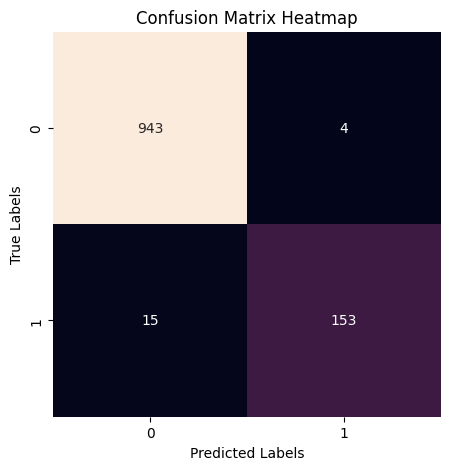

In [23]:
# Generating the confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

# Creating a figure for the heatmap
plt.figure(figsize=(5, 5))

# Plotting the heatmap of the confusion matrix with annotations
sns.heatmap(con_mat, annot=True, fmt='d', cbar=False)

# Adding labels to the x-axis and y-axis
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Adding title to the heatmap
plt.title('Confusion Matrix Heatmap')

In [24]:
# Transforming the testing data into TF-IDF features
test_dtv = vectorizer.transform(x_test)

# Converting the TF-IDF features to array format
test_dtv = test_dtv.toarray()

# Printing the number of observations and tokens in the test data
print(f"Number of Observations: {test_dtv.shape[0]}\nTokens: {test_dtv.shape[1]}")

# Initializing an empty list to store model accuracy and training time
models_accuracy = []

# Looping through each model in the dictionary
for name, model in models.items():
    # Calculating the test accuracy of the model
    test_accuracy = model["model"].score(test_dtv, y_test)

    # Appending model name, test accuracy, and training time to the list
    models_accuracy.append([name, test_accuracy, model["perf"]])

# Creating a DataFrame from the list of model accuracies
df_accuracy = pd.DataFrame(models_accuracy)

# Naming the columns of the DataFrame
df_accuracy.columns = ['Model', 'Test Accuracy', 'Training time (sec)']

# Sorting the DataFrame by test accuracy in descending order
df_accuracy.sort_values(by='Test Accuracy', ascending=False, inplace=True)

# Resetting the index of the DataFrame
df_accuracy.reset_index(drop=True, inplace=True)

# Displaying the DataFrame
df_accuracy


Number of Observations: 1115
Tokens: 7488


,Model,Test Accuracy,Training time (sec)
0,SVM (Linear),0.984753,0.01
1,Random Forest,0.981166,1.14
2,SVM (RBF),0.976682,1.59
3,Decision Tree,0.961435,0.26
4,MultinomialNB,0.956951,0.00
5,Logistic Regr.,0.951570,0.01
6,KNN,0.891480,0.00


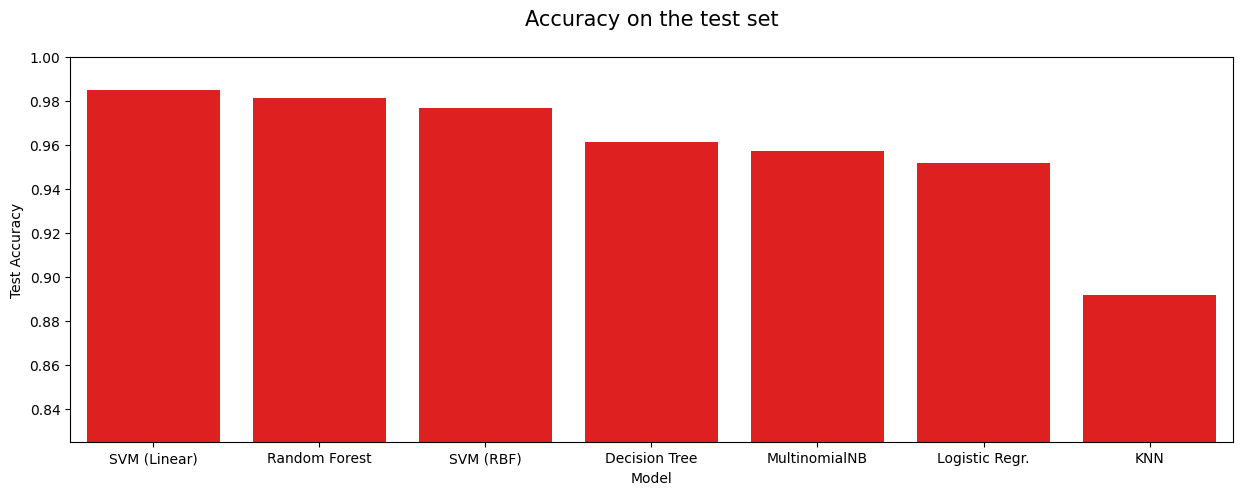

In [25]:
# Creating a bar plot to visualize model accuracies on the test set
plt.figure(figsize=(15, 5))
sns.barplot(x='Model', y='Test Accuracy', data=df_accuracy, color='r')

# Adding title to the plot
plt.title('Accuracy on the test set\n', fontsize=15)

# Setting y-axis limits
plt.ylim(0.825, 1)

# Displaying the plot
plt.show()


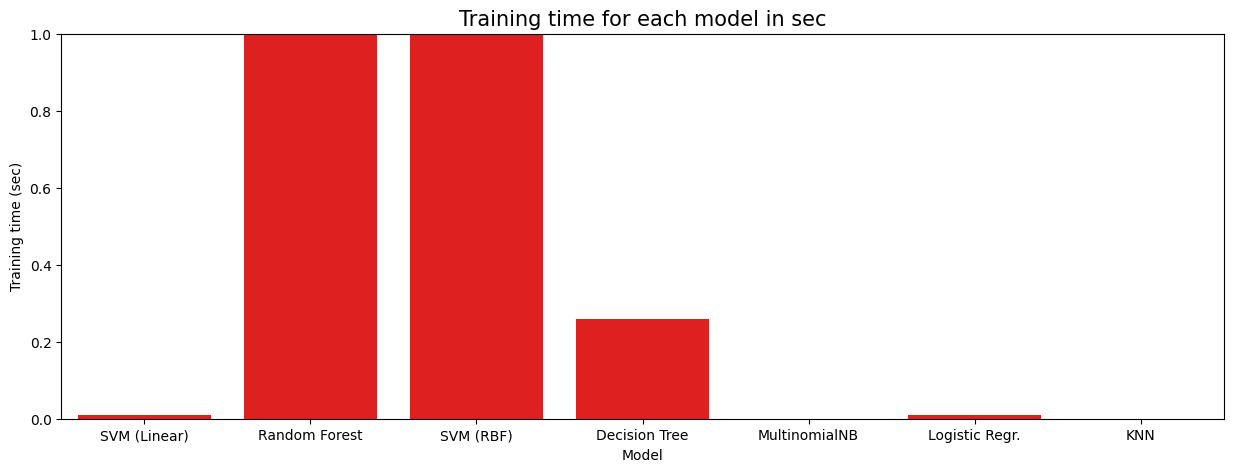

In [26]:
# Creating a bar plot to visualize training time for each model
plt.figure(figsize=(15, 5))
sns.barplot(x='Model', y='Training time (sec)', data=df_accuracy, color='r')

# Adding title to the plot
plt.title('Training time for each model in sec', fontsize=15)

# Setting y-axis limits
plt.ylim(0, 1)

# Displaying the plot
plt.show()


In [27]:
# List containing the input email
input_email = ['Fine if thatÂ’s the way u feel. ThatÂ’s the way its gota b']

# Transforming the input email into TF-IDF features using the trained vectorizer
vectorizer_input = vectorizer.transform(input_email)

# Making a prediction using the trained Multinomial Naive Bayes model
prediction = mnb_model.predict(vectorizer_input)

# Printing the prediction
print(prediction)

# Checking if the prediction indicates a spam or ham email
if (prediction[0] == 1):
    print('Spam Email')
else:
    print('Ham Email')

[0]
Ham Email
